In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

data = sns.load_dataset('penguins')

In [3]:
# Removing null values
data = data.dropna()

data = pd.get_dummies(data, drop_first=True)
corr_matrix = data.corr()

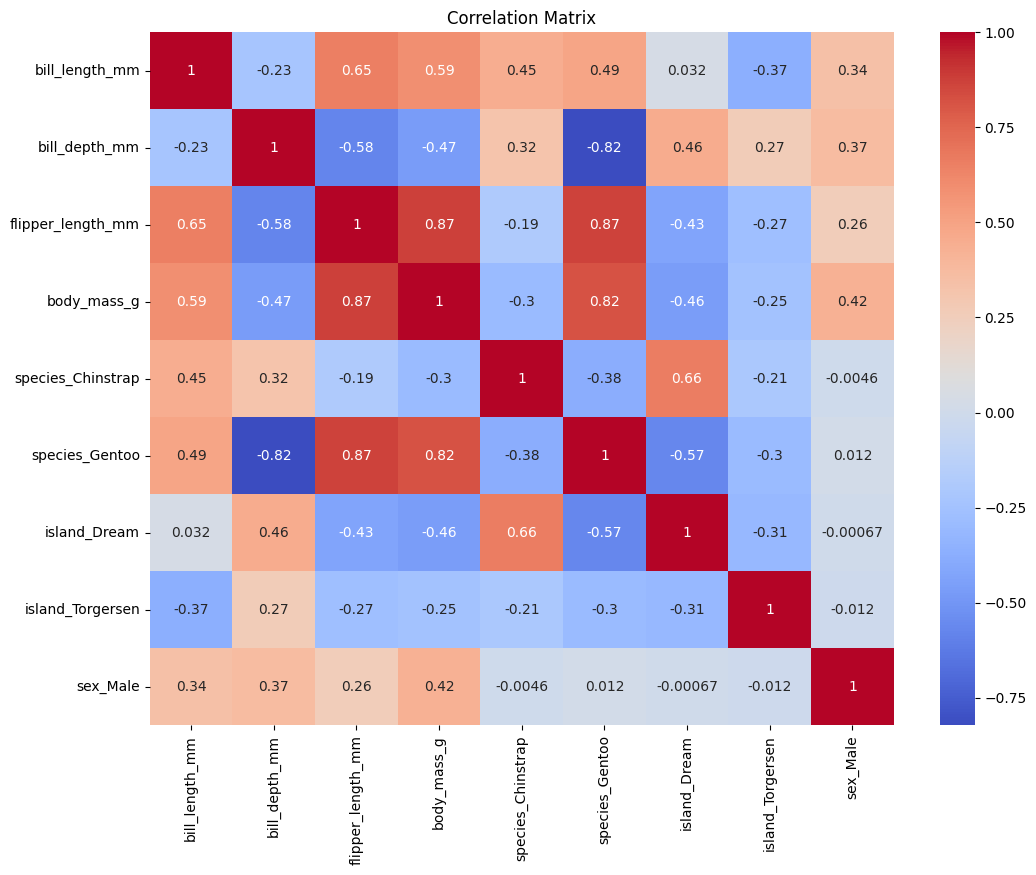

In [4]:
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

In [5]:
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

threshold = 0.8

In [6]:
columns_to_drop = [column for column in upper_corr_matrix.columns if any(abs(upper_corr_matrix[column]) > threshold)]

print("Columns to drop (correlation threshold):", columns_to_drop)

Columns to drop (correlation threshold): ['body_mass_g', 'species_Gentoo']


In [7]:
data = data.drop(columns=columns_to_drop)

In [8]:
print(data)

     bill_length_mm  bill_depth_mm  flipper_length_mm  species_Chinstrap  \
0              39.1           18.7              181.0              False   
1              39.5           17.4              186.0              False   
2              40.3           18.0              195.0              False   
4              36.7           19.3              193.0              False   
5              39.3           20.6              190.0              False   
..              ...            ...                ...                ...   
338            47.2           13.7              214.0              False   
340            46.8           14.3              215.0              False   
341            50.4           15.7              222.0              False   
342            45.2           14.8              212.0              False   
343            49.9           16.1              213.0              False   

     island_Dream  island_Torgersen  sex_Male  
0           False              True    

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)

Explained Variance Ratio: [0.34089639 0.30127809 0.1872352  0.10111062 0.03262939 0.02330165
 0.01354865]
Cumulative Explained Variance: [0.34089639 0.64217449 0.82940969 0.93052031 0.96314969 0.98645135
 1.        ]


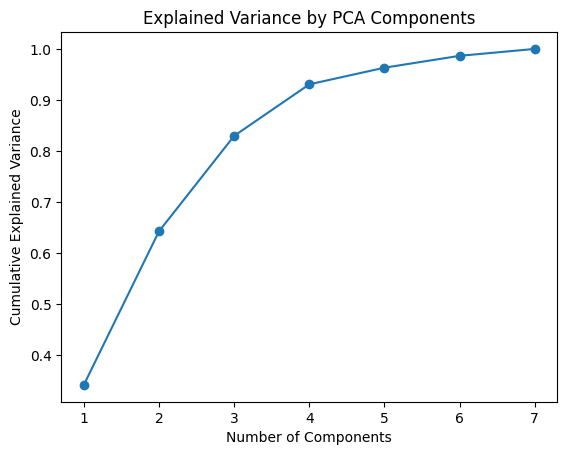

In [11]:
# Plotting the explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()